In [1]:
## petites notes:
# b < BMAX - B
# discr Q >> discr B (B big discr)
# prod matr instead of vec/scalar

# rapporteurs:
#    chercheurs **spécialiste** du domaine qui font des rapports. Suffisant pour soutenir devant un jury ?
#    c'est eux qui valident le contenu (originalité des résultats) dans un délai de 2-3 mois à envoyer à l'ED.
#    Ils donnent l'autorisation de soutenir. (une personne de IP Paris, une personne externe)
#    Pour la carrière enseignant chercheur: ils suivent dans le dossier de candidature.
# jurys:
#    ils lisent mais pas dans le même détail

# Pierre Alquier, Arthur Charpentier, Christian Y. Robert, Vianney Perchet, (Manuel Morales, Stéphane Loisel)

# Dynamic Batch Mode Active Learning : Experimentations

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## 1. Reminder: Dynamic Programming and Hamilton Jacobi Bellman equation

### 1.1. The optimal feedback control

Let denote by $\tau$ the first time where $B$ hits $B_{MAX}$. If ever $Q$ were able to reach $0$ or $1$, it would remain there,

$$
\tau = \inf \left\{ t\ge 0 \quad\;|\;\quad B_t = B_{Max} \;\; \mbox{or}  \;\;Q_t = 0 \;\; \mbox{or}  \;\;Q_t = 1  \right\}
$$

DDP implies

$$
v(Q_{t},B_{t})  =   \sup_{b_s, \; s \in  [t,(t+h)\wedge\tau]} \mathbb{E}[ v(Q_{t+h},B_{t+h}) - \int_{t}^{t+h} c(b_s)ds  | \mathcal{F}_t ]
$$


The function $v$ (if regular enough) should satisfy as well

\begin{eqnarray*}
 v(0+,B) &=& U(0)\\
 v(1-,B) &=& U(1) 
\end{eqnarray*}


We recall the dynamics of the state processes $(Q_t,B_t)$.

\begin{equation*}
\left\{
    \begin{array}{ll}
        dQ_t = \mu(B_t, b_t)\cdot Q_t(1-Q_t)\cdot dt + \sigma(B_t, b_t)\cdot Q_t(1-Q_t)\cdot dW_t\\
        dB_t = b_t \cdot dt
    \end{array}
\right.
\end{equation*}

the HJB equation in the interior of the domain  $[0,1]\times[0,B_{max}]$ rewrites 

\begin{eqnarray}\label{eq:HJB_Interior}
 \sup_{b\ge 0} \left\{ \mu(B,b) Q (1-Q) \frac{\partial v}{\partial Q} (Q,B) + b \frac{\partial v}{\partial B} (Q,B) + \frac{1}{2}\sigma(B,b)^2 Q^2 (1-Q)^2 \frac{\partial^2 v}{\partial Q^2} (Q,B) -c(b) \right\} = 0
\end{eqnarray}

together with the boundary condition

\begin{eqnarray}\label{eq:HJB_Boundary}
 v(Q,B_{max}) &=& U(Q)  \quad \mbox{for} \quad  Q\in (0,1) 
\end{eqnarray}

The optimal control $b^*$ as a function of $(Q,B)$ is the optimizer.

Let us denote

$$
A(B, b, Q) = \mu(B,b) Q (1-Q) \frac{\partial v}{\partial Q} (Q,B) + b \frac{\partial v}{\partial B} (Q,B) + \frac{1}{2}\sigma(B,b)^2 Q^2 (1-Q)^2 \frac{\partial^2 v}{\partial Q^2} (Q,B) -c(b)
$$

### 1.2. EDP approximation by finite diffrence and Howard algorithm

One approximation of $A$ (by finite difference) is

<font color=red>
$$
\hat{A}(B, b, Q, v_{i-1, j}) = \mu(B,b) Q (1-Q) \frac{v_{i, j+1}-v_{i,j}}{dQ} + b \frac{v_{i,j}-v_{i-1, j}}{dB} + \frac{1}{2}\sigma(B,b)^2 Q^2 (1-Q)^2 \frac{v_{i, j+1}-2v_{i,j}+v_{i,j-1}}{dQ^2} -c(b)
$$
</font>

Therefore we have the following empirical relation,

<font color=red>
$$
 \sup_{b\ge 0, b\le B_{MAX}-B} \left\{\hat{A}(B, b, Q, v_{i-1, j})\right\} = 0
$$
</font>


with $v_{i, j} = v(B_{i}, Q_j)$.

**Here the problem is to find $b^*$ realizing the above expression. $b^*$ should be dependant to $v_{i-1,\cdot}$**

<font color=red>
\begin{equation*}
\left\{
    \begin{array}{ll}
        b^* = \arg\sup\limits_{b\ge 0, b\le B}\left\{\mu(B,b) Q (1-Q) \frac{v_{i, j+1}-v_{i,j}}{dQ} + b \frac{v_{i,j}-v_{i-1, j}}{dB} + \frac{1}{2}\sigma(B,b)^2 Q^2 (1-Q)^2 \frac{v_{i, j+1}-2v_{i,j}+v_{i,j-1}}{dQ^2} -c(b) \right\}\\
    v_{i-1, j} = \frac{dB}{b^*}\left(\mu(B,b^*)Q(1-Q)\frac{v_{i,j+1}-v_{i,j}}{dQ} + \frac{1}{2}\sigma(B, b^*)^2Q^2(1-Q)^2\frac{v_{i,j+1}-2v_{i,j}+v_{i,j-1}}{dQ^2} - c(b^*) \right) + v_{i,j}
    \end{array}
\right.
\end{equation*}
</font>

For each $(B, Q)$ we can use the **Howard algorithm**:

**STEP 1:** start with an initial value $b^0$. Compute the solution $u^{0}$ of $\hat{A}(B, b^0, Q, u^{0}) = 0$ i.e.

\begin{equation*}
u^{0} = \frac{dB}{b^0}\left(\mu(B,b^0)Q(1-Q)\frac{v_{i,j+1}-v_{i,j}}{dQ} + \frac{1}{2}\sigma(B, b^0)^2Q^2(1-Q)^2\frac{v_{i,j+1}-2v_{i,j}+v_{i,j-1}}{dQ^2} - c(b^0) \right) + v_{i,j}
\end{equation*}

**STEP 2 ($k$ to $k+1$):** given $u^{k}$, find $b^{k+1}$ maximizing

\begin{equation*}
\sup\limits_{b\ge 0, b\le B_{MAX}-B}\left\{\mu(B,b) Q (1-Q) \frac{v_{i, j+1}-v_{i,j}}{dQ} + b \frac{v_{i,j}-u}{dB} + \frac{1}{2}\sigma(B,b)^2 Q^2 (1-Q)^2 \frac{v_{i, j+1}-2v_{i,j}+v_{i,j-1}}{dQ^2} -c(b) \right\}
\end{equation*}

compute the solution $u^{k+1}$ of $\hat{A}(B, b^{k+1}, Q, u^{k+1}) = 0$

**FINAL STEP:** if $|u^{k+1}-u^{k}|<\epsilon$, then set $v_{i,j-1} = u^{k+1}$ else go to STEP 2.





**Remark:** can we guarantee the convergence ?

## 2. Numerical analysis

### 2.0. Librairies and parameters

In [3]:
# LIBRAIRIES
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import gridspec
import random

In [4]:
# NUMERICAL PARAMETERS (20, 100)
NQ   = 20    #Number of grid points
BMAX = 500   #Number of labeled points
dQ_step = 1/(NQ)  #Grid step
dB_step = 1       #Grid step
b_batch = 10

### 2.1. Main functions and algorithms

In [5]:
# MAIN FUNCTIONS
BETAC = 5*10**(-6)
BETAS = 0.5
BETAM = 0.5
P = 0.9

def U(Q, p=P):
    return (Q**p)/p

def sigma(B, b, betas = BETAS):
    return betas*(1.01-b/(B+b)) * (B+b>0)
    #return betas*(b/(B+b)) * (B+b>0)

def mu(B, b, betam = BETAM):
    return betam*(b/(B+b)) * (B+b>0)

def cost(b, betac=BETAC, d = 2, alphac=0):
    return alphac + betac * b**d

In [6]:
## PLOTS
from matplotlib.patches import Rectangle

def viz_heatmap(b_optimal, title="", btr_i=None, btr_j=None, BMAX=BMAX, ax=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    b_optimal_copy = b_optimal.copy()
    pos = ax.imshow(b_optimal_copy, cmap='YlGnBu', interpolation='nearest', aspect='auto') # "hot"
    add_title = ""
    if btr_i is not None or btr_j is not None:
        for i, j in zip(btr_i, btr_j):
            #print(i, j)
            ax.add_patch(Rectangle((j, i), 0.5, 1, fill=False, edgecolor='crimson', lw=2))
        add_title += ",\nSimulated trajectory is highlighted in red"
    ax.set_title(f"{title} w.r.t. (Q, B)"+add_title, fontsize=15)
    ax.set_xlabel(u"$Q$", fontsize=15)
    ax.set_ylabel(u"$B$", fontsize=15)
    ax.set_xticks([0, b_optimal.shape[1]//2, b_optimal.shape[1]])
    ax.set_xticklabels([0, 0.5, 1])
    ax.set_yticks([0, b_optimal.shape[0]//2, b_optimal.shape[0]])
    ax.set_yticklabels([0, BMAX//2, BMAX])
    fig.colorbar(pos, ax=ax)
    return ax

def heatmap_by_param(optimal_by_param, betac=".", betam=".", betas=".", p="."):
    interval = optimal_by_param["interval"]
    param_name = optimal_by_param["param_name"]
    for val in optimal_by_param["values"]:
        fig = plt.figure(figsize=(16, len(interval)-1))
        spec = gridspec.GridSpec(ncols=5, nrows=len(interval)//5 + 1, wspace=0.42, hspace=0.5)
        for i, beta in enumerate(interval):
            ax1 = fig.add_subplot(spec[i])
            optimal = optimal_by_param["values"][val][i].copy()
            pos = ax1.imshow(optimal, cmap='YlGnBu', interpolation='nearest', aspect='auto') # "hot"
            title_name = f"{val}, {param_name}={round(beta, 6)}\n"
            if param_name=="betac":
                title_name += f"p={p}, beta_m,s=({round(betam, 6)}, {round(betas, 6)})"
            if param_name=="betam":
                title_name += f"p={p}, beta_c,s=({round(betac, 6)}, {round(betas, 6)})"
            if param_name=="betas":
                title_name += f"p={p}, beta_c,m=({round(betac, 6)}, {round(betam, 6)})"
            if param_name=="p":
                title_name += f"beta_c,m,s=({round(betac, 6)}, {round(betam, 6)}, {round(betas, 6)})"
            ax1.set_title(title_name, fontsize=10)
            ax1.set_xlabel(u"$Q$", fontsize=12)
            ax1.set_ylabel(u"$B$", fontsize=12)
            ax1.set_xticks([0, optimal.shape[1]//2, optimal.shape[1]])
            ax1.set_xticklabels([0, 0.5, 1])
            fig.colorbar(pos, ax=ax1)
            
def viz_main_functions(BMAX, NQ):
    fig = plt.figure(figsize=(16, 6))
    spec = gridspec.GridSpec(ncols=4, nrows=2, wspace=0.3,
                             hspace=0, height_ratios=[1, 2])
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    ax3 = fig.add_subplot(spec[2])
    ax4 = fig.add_subplot(spec[3])
    ax5 = fig.add_subplot(spec[4], projection='3d')
    ax6 = fig.add_subplot(spec[5], projection='3d')

    bs = np.arange(0, BMAX)
    qs = np.linspace(0, 1, NQ)
    yc = cost(bs)
    yu = U(qs)
    ys = sigma(BMAX, bs)
    ym = mu(BMAX, bs)

    ax1.plot(qs, yu)
    ax1.set_ylabel(u"$U(Q)$", fontsize=15)
    ax1.set_xlabel(u"$Q$", fontsize=15)
    ax1.set_title(u"$Q^p/p$", fontsize=12)

    ax2.plot(bs, yc)
    ax2.set_ylabel(u"$cost(b)$", fontsize=15)
    ax2.set_xlabel(u"$b$", fontsize=15)
    ax2.set_title(u"$beta_c \ b^2$", fontsize=12)

    ax3.plot(bs, ym)
    ax3.set_ylabel(u"$\mu(B_{MAX}, b)$", fontsize=15)
    ax3.set_xlabel(u"$b$", fontsize=15)
    ax3.set_title(u"$beta_m$ $b/(b+B)$", fontsize=12)

    ax4.plot(bs, ys)
    ax4.set_ylabel(u"$\sigma(B_{MAX}, b)$", fontsize=15)
    ax4.set_xlabel(u"$b$", fontsize=15)
    ax4.set_title(u"$beta_s$ $(1-b/(b+B))$", fontsize=12)

    Bm = np.arange(1, BMAX)
    bm = np.arange(1, BMAX)
    B_mesh, b_mesh = np.meshgrid(Bm, bm)
    Z_sigma = sigma(B_mesh, b_mesh)
    Z_mu = mu(B_mesh, b_mesh)

    ax5.contour3D(B_mesh, b_mesh, Z_sigma, 100, alpha= 0.8, cmap=cm.coolwarm)
    ax5.set_xlabel(u'$B$', fontsize=15)
    ax5.set_ylabel(u'$b$', fontsize=15)
    ax5.set_zlabel(u'$\sigma(B, b)$', fontsize=15)
    #for angle in range(0, 180):
    #    ax5.view_init(45, angle)

    ax6.contour3D(B_mesh, b_mesh, Z_mu, 100, alpha= 0.8, cmap=cm.coolwarm)#cm.coolwarm)
    ax6.set_ylabel(u"$B$", fontsize=15)
    ax6.set_xlabel(u"$b$", fontsize=15)
    ax6.set_zlabel(u'$\mu(B, b)$', fontsize=15);

In [7]:
# use the Howard algorithm !! page 197 !!
## MAIN ALGORITHM
def optimal_batch(dQ_step, dB_step, Bmax,
                  print_res = True,
                  print_steps = True,
                  plot_distrib = True,
                  eps = 0.0001,
                  n_iterations = 10,
                  n_explosions = 20,
                  n_print_coeffs = 0,
                  betac = 0.00025,
                  betam = 0.5,
                  betas = 0.5,
                  p = 0.9):
    cut = 6
    
    # Initialisation
    Qs = np.arange(0, 1+dQ_step, dQ_step)
    Bs = np.arange(1, Bmax+dB_step-1, dB_step)
    V = np.zeros((len(Bs), len(Qs)))

    # conditions aux bords
    V[len(Bs)-1, :] = U(Qs, p)
    V[:, 0] = U(0.01, p)#U(0.01, p)
    V[:, -1] = U(0.99, p)#U(0.99, p)
    
    # functions
    def Ufunction(B, b, Q, V, i, j):
        return mu(B,b,betam)*Q*(1-Q)*(V[i,j]-V[i,j-1])/dQ_step + (V[i,j]-V[i-1,j])*b/dB_step + 0.5*sigma(B,b,betas)**2 * Q**2 * (1-Q)**2 * (V[i,j+1]-2*V[i,j]+V[i,j-1])/(dQ_step**2)
    
    def Afunction(B, b, Q, V, i, j):
        return Ufunction(B, b, Q, V, i, j) - cost(b, betac=betac) #OK
        #return np.abs(Ufunction(B, b, Q, V, i, j)) - cost(b, betac=betac) #TEST

    def Vfunction(B, b_opt, Q, V, i, j):
        res = (dB_step/b_opt)*(mu(B,b_opt, betam)*Q*(1-Q)*(V[i,j]-V[i,j-1])/dQ_step + 0.5*sigma(B, b_opt, betas)**2 * Q**2 * (1-Q)**2 * (V[i,j+1]-2*V[i,j]+V[i,j-1])/(dQ_step**2) - cost(b_opt, betac=betac) ) + V[i,j]
        #res = np.minimum(res, U(0.99))
        #res = np.maximum(res, U(0.01))
        return res
    if n_print_coeffs > 0:
        plt.figure(figsize=(16, 2*(1 + n_print_coeffs//cut)))
    
    #print("Shape of V:", V.shape)
    b_optimal = np.zeros((len(Bs), len(Qs)))
    b_optimal_over_B = np.zeros((len(Bs), len(Qs)))
    b_ratio_notconv = []
    b_ratio_conv = []
    n_expl = 0
    n_coef = 0
    n_coef_count = 0
    keep_i = []
    keep_j = []
    
    for i, B in list(enumerate(Bs[:-1], start=1))[::-1]:
        bs = np.arange(dB_step, Bmax-B+dB_step, dB_step)#np.arange(1, Bmax-B+dB_step, dB_step)#
        #print(bs.shape, Bmax-B)
        for j, Q in list(enumerate(Qs[1:-1], start=1))[::-1]:
            n_iter = 0
            # STEP 1
            b_k = random.choice(bs)
            u_k = Vfunction(B, b_k, Q, V, i, j)
            # STEP 2
            while True:
                V[i-1, j] = u_k
                n_iter += 1
                # compute b^{k+1}
                A_hat = Afunction(B, bs, Q, V, i, j)
                ind_max = np.argmax(A_hat)
                b_k = bs[ind_max]
                # compute u^{k+1}
                u_k = Vfunction(B, b_k, Q, V, i, j)
                if np.abs(V[i-1, j] - u_k) < eps:
                    #u_k = np.minimum(u_k, U(0.99))
                    #u_k = np.maximum(u_k, U(0.01))
                    if u_k >= 1 and print_steps and n_expl < n_explosions:
                        n_expl += 1
                        print(f"coord={(i, j)}\t, v={round(u_k, 2)}, vneigh=({round(V[i, j+1], 2)},{round(V[i, j], 2)},{round(V[i, j-1], 3)})\t, b={b_k}\t, A_hat[ind_max]={A_hat[ind_max].round(2)}\t, n_iter={n_iter}\t, n_expl={n_expl}")
                    
                    if n_coef < n_print_coeffs and n_coef_count == 0:
                        keep_i.append(i)
                        keep_j.append(j)
                        n_coef_count += 1
                        plt.subplot((1+n_print_coeffs//cut), cut+1, 1)
                        plt.plot(bs, Ufunction(B, bs, Q, V, i, j), label=f"$U$")
                        plt.plot(bs, cost(bs,betac=betac), label=f"$C$")
                        plt.scatter(b_k, Ufunction(B, b_k, Q, V, i, j), color="red")
                        plt.scatter(b_k, cost(b_k,betac=betac), color="red")
                        plt.title(f"v={round(u_k, 2)},\n(B,Q)={(round(B, 0),round(Q, 3))}", fontsize=10)
                        plt.legend()
                    if (n_coef < n_print_coeffs and u_k >= 1) or (0 < n_print_coeffs and i==len(Bs)//2 and j==len(Qs)//2) or (u_k < 0 and n_coef < n_print_coeffs):
                        keep_i.append(i)
                        keep_j.append(j)
                        n_coef += 1
                        plt.subplot((1+n_print_coeffs//cut), cut+1, n_coef+1)
                        plt.plot(bs, Ufunction(B, bs, Q, V, i, j), label=f"$U$") # concave in b
                        plt.plot(bs, cost(bs,betac=betac), label=f"$C$") # concave in b
                        plt.scatter(b_k, Ufunction(B, b_k, Q, V, i, j), color="red")
                        plt.scatter(b_k, cost(b_k,betac=betac), color="red")
                        plt.title(f"v={round(u_k, 2)},\n(B,Q)={(round(B, 0),round(Q, 3))}", fontsize=10)
                        plt.legend()
                        #print(f"coord={(i, j)}\t, A={round(Afunction(B, b_k, Q, V, i, j), 6)}\t, cost={round(cost(b_k,betac=betac), 6)}\t, n_coef={n_coef}")
                    
                    V[i-1, j] = u_k
                    b_opt = b_k
                    b_ratio_conv.append(b_opt/(Bmax-B))
                    break

                if n_iter > n_iterations:
                    V[i-1, j] = u_k
                    b_opt = b_k
                    b_ratio_notconv.append(b_opt/(Bmax-B))
                    break

            b_optimal[i, j] = b_opt
            b_optimal_over_B[i, j] = b_opt/(Bmax-B)
    if print_res:
        print("-------------------------------------------")
        print("----------------- RESULTS -----------------")
        print("-------------------------------------------")
        print("b optimal:\n", b_optimal)
        print("b/B optimal:\n", b_optimal_over_B)
        print("b unique values:\n", np.unique(b_optimal))
        print("V values:\n", V)
    if n_print_coeffs > 0:
        #plt.tight_layout();
        plt.show()
    if plot_distrib:
        plt.figure(figsize=(16, 3))
        plt.subplot(1, 2, 1)
        plt.hist(b_ratio_conv)
        plt.xlabel("b/B")
        plt.ylabel("count")
        plt.title(u"Distribution of $b/(BMAX-B)$ (convergence of the method)")
        plt.subplot(1, 2, 2)
        plt.hist(b_ratio_notconv)
        plt.xlabel("b/(BMAX-B)")
        plt.ylabel("count")
        plt.title(u"Distribution of $b/(BMAX-B)$ (non convergence of the method)");
        
    return b_optimal, b_optimal_over_B, V, keep_i, keep_j

### 2.2. functions: some visualizations

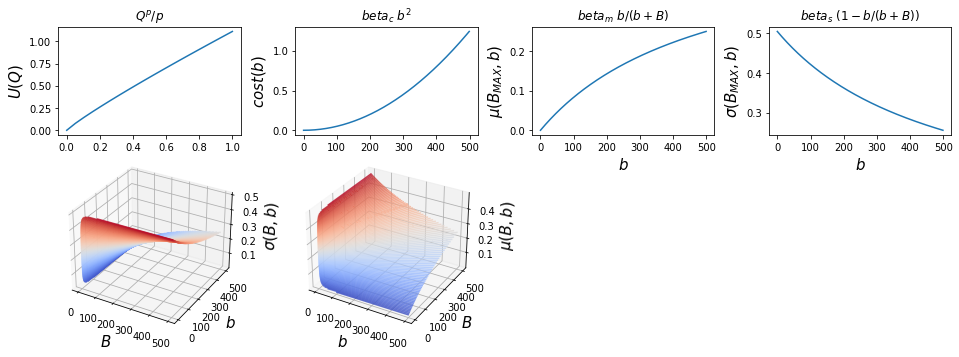

In [8]:
viz_main_functions(BMAX, NQ)

### 2.3. Experimentations

coord=(498, 19)	, v=1.06, vneigh=(1.1,1.06,1.011)	, b=2	, A_hat[ind_max]=-0.0	, n_iter=1	, n_expl=1
coord=(498, 18)	, v=1.01, vneigh=(1.06,1.01,0.96)	, b=2	, A_hat[ind_max]=-0.0	, n_iter=1	, n_expl=2
coord=(497, 19)	, v=1.06, vneigh=(1.1,1.06,1.011)	, b=3	, A_hat[ind_max]=0.0	, n_iter=2	, n_expl=3
coord=(497, 18)	, v=1.01, vneigh=(1.06,1.01,0.96)	, b=3	, A_hat[ind_max]=0.0	, n_iter=2	, n_expl=4
coord=(496, 19)	, v=1.06, vneigh=(1.1,1.06,1.011)	, b=4	, A_hat[ind_max]=0.0	, n_iter=1	, n_expl=5
coord=(496, 18)	, v=1.01, vneigh=(1.06,1.01,0.96)	, b=4	, A_hat[ind_max]=-0.0	, n_iter=1	, n_expl=6
coord=(495, 19)	, v=1.06, vneigh=(1.1,1.06,1.011)	, b=5	, A_hat[ind_max]=-0.0	, n_iter=1	, n_expl=7
coord=(495, 18)	, v=1.01, vneigh=(1.06,1.01,0.96)	, b=5	, A_hat[ind_max]=0.0	, n_iter=1	, n_expl=8
coord=(494, 19)	, v=1.06, vneigh=(1.1,1.06,1.011)	, b=6	, A_hat[ind_max]=-0.0	, n_iter=2	, n_expl=9
coord=(494, 18)	, v=1.01, vneigh=(1.06,1.01,0.96)	, b=6	, A_hat[ind_max]=-0.0	, n_iter=1	, n_expl=10


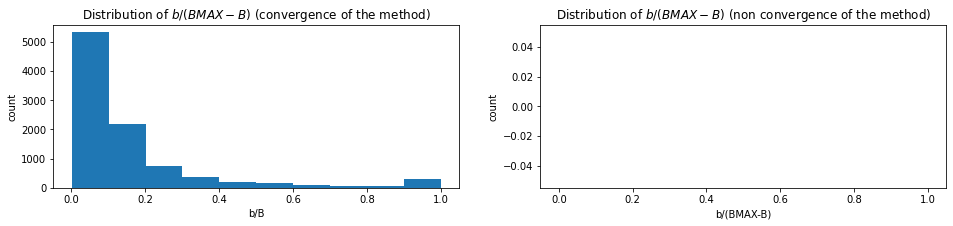

In [9]:
b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = True,
                                               plot_distrib = True,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 10,
                                               betac = BETAC,#5*10**(-7),
                                               betam = BETAM,#0.5,
                                               betas = BETAS,#0.5,
                                               p = P)

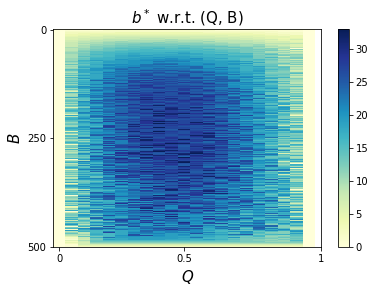

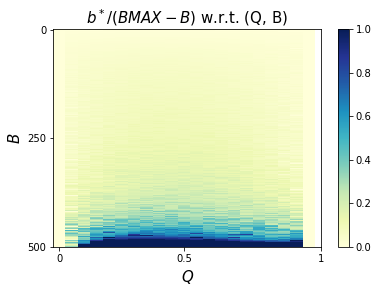

In [10]:
b_optimal_over_B1 = b_optimal_over_B.copy()
viz_heatmap(b_optimal, title="$b^*$");
viz_heatmap(b_optimal_over_B1, title="$b^*/(BMAX-B)$");

In [11]:
list(zip(V[:, 0].round(3), V[:, 1].round(3), V[:, -2].round(3), V[:, -1].round(3)))[-10:]

[(0.018, 0.078, 1.059, 1.101),
 (0.018, 0.078, 1.059, 1.101),
 (0.018, 0.078, 1.059, 1.101),
 (0.018, 0.078, 1.06, 1.101),
 (0.018, 0.078, 1.06, 1.101),
 (0.018, 0.077, 1.06, 1.101),
 (0.018, 0.077, 1.06, 1.101),
 (0.018, 0.077, 1.06, 1.101),
 (0.018, 0.076, 1.06, 1.101),
 (0.018, 0.075, 1.061, 1.101)]

In [12]:
print(V[-5:, :])

[[0.01760992 0.07735892 0.13909449 0.19999939 0.25932635 0.31732234
  0.37424659 0.43028866 0.48558401 0.54022991 0.59429877 0.6478459
  0.70091432 0.75353778 0.80574286 0.85755033 0.9089721  0.95999624
  1.01050267 1.05974302 1.10110609]
 [0.01760992 0.07699648 0.13909253 0.20014159 0.25951203 0.31751269
  0.37442436 0.43044759 0.48571954 0.54033901 0.59437982 0.64789862
  0.7009397  0.75353812 0.80572179 0.85751294 0.90892913 0.95996811
  1.01053329 1.05990548 1.10110609]
 [0.01760992 0.0765198  0.1391408  0.20037482 0.25979833 0.31780111
  0.37470254 0.43070567 0.48594997 0.54053635 0.59454057 0.64802109
  0.70102396 0.753586   0.80573692 0.85750088 0.90889754 0.95994287
  1.01057196 1.0601209  1.10110609]
 [0.01760992 0.07587748 0.13930758 0.20078334 0.26024421 0.31826083
  0.37515615 0.43113693 0.48634604 0.54088752 0.59484    0.64826469
  0.70121028 0.75371622 0.80581489 0.85753323 0.90889383 0.9599158
  1.0106154  1.06043538 1.10110609]
 [0.01760992 0.07496016 0.1398806  0.20148

### 2.4. Tune hyper-parameters (visually)

#### 2.4.1. beta_c

In [13]:
betac = None

In [14]:
## OLD
para_name = "betac"
p = 0.9
#betac = 5*10**(-6)
betam = 0.6
betas = 0.5
step = 5*10**(-7)
interval = step * np.arange(1, 10, 2)

optimal_by_cost = dict()
optimal_by_cost["interval"] = interval
optimal_by_cost["param_name"] = para_name
optimal_by_cost["values"] = dict()
optimal_by_cost["values"]["b*"] = []
optimal_by_cost["values"]["b*/(BMAX-B)"] = []
#optimal_by_cost["values"]["V"] = []

for i, beta in enumerate(interval):
    b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = False,
                                               plot_distrib = False,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 15,
                                                  betac = beta,
                                                  betam = betam,
                                                  betas = betas,
                                                  p=p)
    optimal_by_cost["values"]["b*"].append(b_optimal)
    optimal_by_cost["values"]["b*/(BMAX-B)"].append(b_optimal_over_B)
    #optimal_by_cost["values"]["V"].append(V)

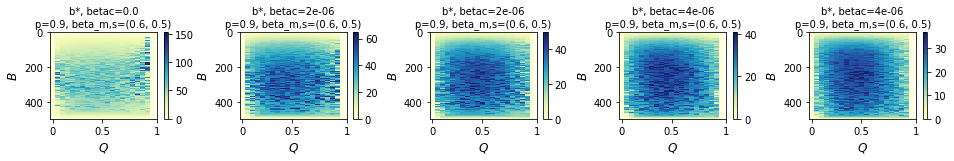

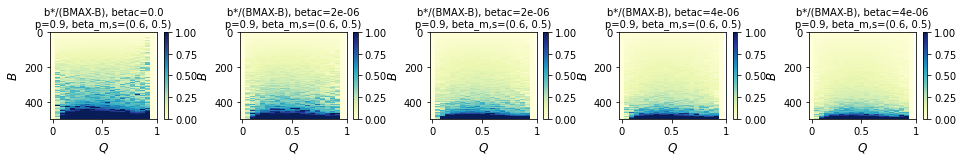

In [15]:
heatmap_by_param(optimal_by_cost, betac=betac, betam=betam, betas=betas, p=p)

#### 2.4.2. beta_m

In [16]:
## OLD
para_name = "betam"
p = 0.9
betac = 5*10**(-6)
#betam = 0.6
betas = 0.5
step = 0.1
interval = step * np.arange(1, 10, 2)

optimal_by_cost = dict()
optimal_by_cost["interval"] = interval
optimal_by_cost["param_name"] = para_name
optimal_by_cost["values"] = dict()
optimal_by_cost["values"]["b*"] = []
optimal_by_cost["values"]["b*/(BMAX-B)"] = []
#optimal_by_cost["values"]["V"] = []

for i, beta in enumerate(interval):
    b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = False,
                                               plot_distrib = False,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 15,
                                                  betac = betac,
                                                  betam = beta,
                                                  betas = betas,
                                                  p=p)
    optimal_by_cost["values"]["b*"].append(b_optimal)
    optimal_by_cost["values"]["b*/(BMAX-B)"].append(b_optimal_over_B)
    #optimal_by_cost["values"]["V"].append(V)

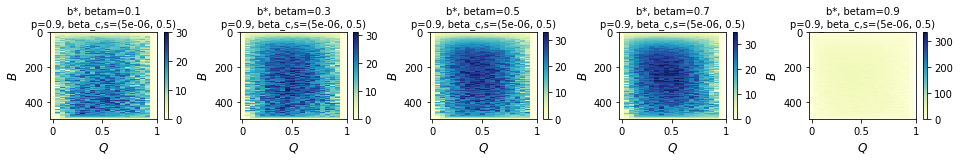

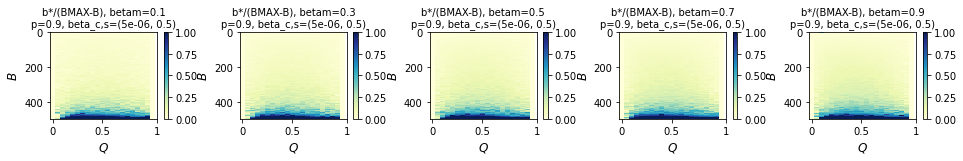

In [17]:
heatmap_by_param(optimal_by_cost, betac=betac, betam=betam, betas=betas, p=p)

#### 2.4.3. beta_s

In [18]:
## OLD
para_name = "betas"
p = 0.9
betac = 5*10**(-6)
betam = 0.6
#betas = 0.5
step = 0.1
interval = step * np.arange(1, 10, 2)

optimal_by_cost = dict()
optimal_by_cost["interval"] = interval
optimal_by_cost["param_name"] = para_name #MODIFY
optimal_by_cost["values"] = dict()
optimal_by_cost["values"]["b*"] = []
optimal_by_cost["values"]["b*/(BMAX-B)"] = []
#optimal_by_cost["values"]["V"] = []

for i, beta in enumerate(interval):
    b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = False,
                                               plot_distrib = False,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 15,
                                                  betac = betac,
                                                  betam = beta,
                                                  betas = betas,
                                                  p=p)
    optimal_by_cost["values"]["b*"].append(b_optimal)
    optimal_by_cost["values"]["b*/(BMAX-B)"].append(b_optimal_over_B)
    #optimal_by_cost["values"]["V"].append(V)

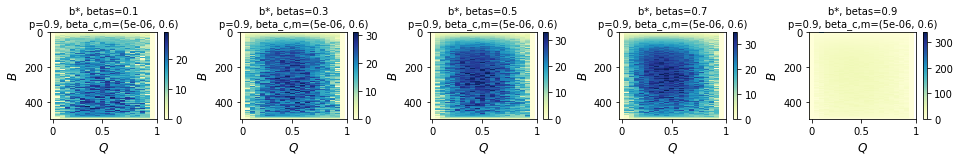

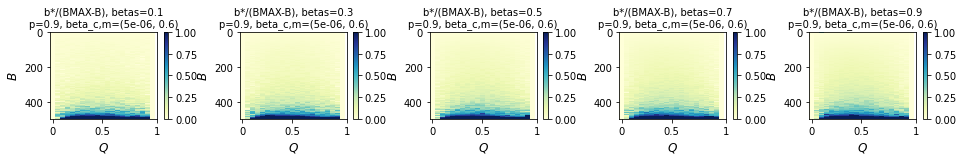

In [19]:
heatmap_by_param(optimal_by_cost, betac=betac, betam=betam, betas=betas, p=p)

#### 2.4.4. p

In [20]:
## OLD
#p = 0.99
betac = 5*10**(-6)
betam = 0.7
betas = 0.6
step = 0.1
interval = step * np.arange(1, 10, 2)

optimal_by_cost = dict()
optimal_by_cost["interval"] = interval
optimal_by_cost["param_name"] = "p" #MODIFY
optimal_by_cost["values"] = dict()
optimal_by_cost["values"]["b*"] = []
optimal_by_cost["values"]["b*/(BMAX-B)"] = []
#optimal_by_cost["values"]["V"] = []

for i, p in enumerate(interval):
    b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = False,
                                               plot_distrib = False,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 15,
                                                  betac = betac,
                                                  betam = betam,
                                                  betas = betas,
                                                  p=p)
    optimal_by_cost["values"]["b*"].append(b_optimal)
    optimal_by_cost["values"]["b*/(BMAX-B)"].append(b_optimal_over_B)
    #optimal_by_cost["values"]["V"].append(V)

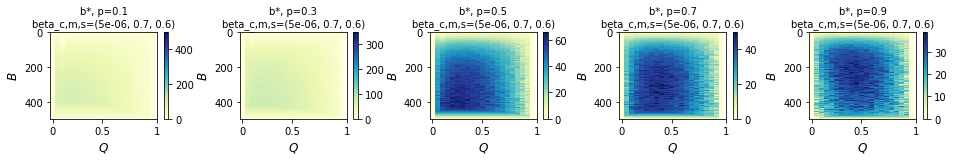

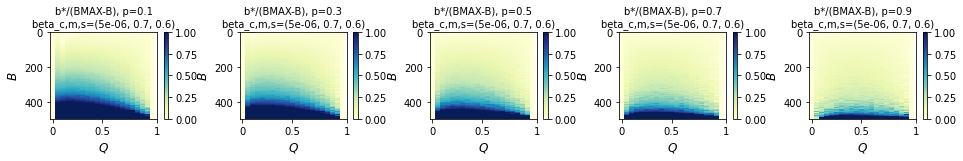

In [21]:
heatmap_by_param(optimal_by_cost, betac=betac, betam=betam, betas=betas, p=p)

Let us set:
- $p = 0.7$
- $\beta_c = 5\times 10^{-6}$
- $\beta_m = 0.7$
- $\beta_s = 0.6$

In [22]:
# TODO1: Analyze these results and deduce how we can use them in practice
# TODO2: Maybe analyze theoretically the convergence (and value explosion) issues ?
# TODO3: Put these results on Latex

## 3. Trajectories after calibration

### 3.1. Calibration

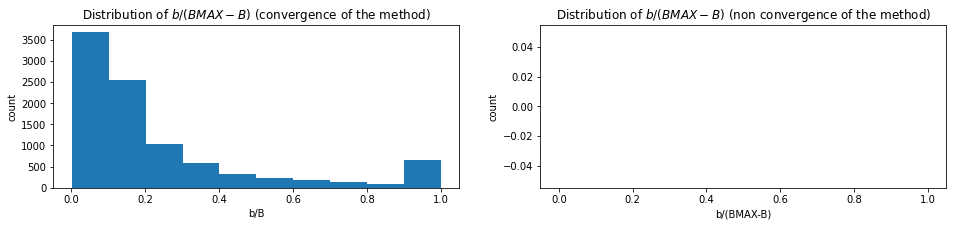

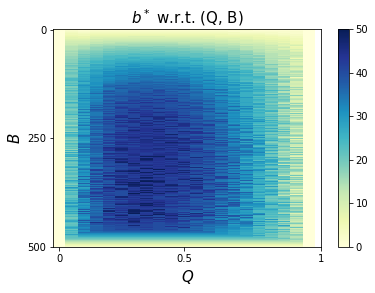

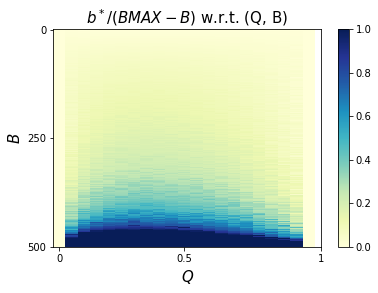

In [23]:
BETAC = 5*10**(-6)
BETAS = 0.6
BETAM = 0.7
P = 0.7

def U(Q, p=P):
    return (Q**p)/p

def sigma(B, b, betas = BETAS):
    return betas*(1-b/(B+b))

def mu(B, b, betam = BETAM):
    return betam*(b/(B+b))

def cost(b, betac=BETAC):
    return betac*b**2

b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step, dB_step, BMAX,
                                               print_res = False,
                                               print_steps = True,
                                               plot_distrib = True,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 0,
                                               betac = BETAC,
                                               betam = BETAM,
                                               betas = BETAS,
                                               p = P) #0.9

viz_heatmap(b_optimal, title="$b^*$")
viz_heatmap(b_optimal_over_B, title="$b^*/(BMAX-B)$");

### 3.2. Simulations

In [24]:
np.random.seed(88)

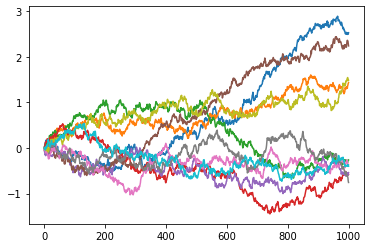

In [25]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
def stochastic_simulation(b_optimal, B0=1, Q0=0.5, n=1000, T=10, n_print_coeffs=0):
    """
    Generate the state processes simulation
    """
    
    dt = T/n
    Br = Brownian()
    dW = 2*Br.gen_normal(n)
    
    NB, NQ = b_optimal.shape
    dQ_step = 1/NQ
    dB_step = 1
    Qs = np.arange(0, 1+dQ_step, dQ_step)
    Bs = np.arange(1, BMAX+dB_step, dB_step)
    
    b0 = B0
    B = list()
    Q = list()
    b = list()
    btr_i = list()
    btr_j = list()

    B.append( B0 )
    Q.append( Q0 )
    b.append( b0 )
    bi = np.where(B[0] <= Bs)[0][0]+1
    bj = np.where(Q[0] <= Qs)[0][0]-1
    btr_i.append( bi )
    btr_j.append( bj )
    b.append( int(b_optimal[bi, bj]) )
    #print(b)        
    
    t = 1
    while B[t-1] + b[t] < BMAX and Q[t-1] > 0 and Q[t-1] < 1 and t < BMAX and b[t] > 0:
        try:
            B.append( int(B[t-1] + b[t]) ) # HERE instead of dBt = bt*dt we choose dBt = bt
            Q.append( Q[t-1] + mu(B[t-1],b[t])*Q[t-1]*(1-Q[t-1])*dt + sigma(B[t-1],b[t])*Q[t-1]*(1-Q[t-1])*dW[t] )
            #print(B[t], Q[t])
            
            if t<=n_print_coeffs:
                print(f"t = {t},\t mu*dt = {round(mu(B[t-1],b[t])*dt, 4)},\t sigma*dWt = {round(sigma(B[t-1],b[t])*dW[t], 4)}")
            
            bi = np.where(B[t] <= Bs)[0][0]+1
            bj = np.where(Q[t] <= Qs)[0][0]-1
            btr_i.append(bi)
            btr_j.append(bj)
            #print(bi, B[t])
            b.append( int(b_optimal[bi, bj]) )
            t += 1
        except:
            break
    if n_print_coeffs > 0:
        print()
    return B, Q, b, btr_i, btr_j

for _ in range(10):
    Br = Brownian()
    plt.plot(Br.gen_normal(1000));

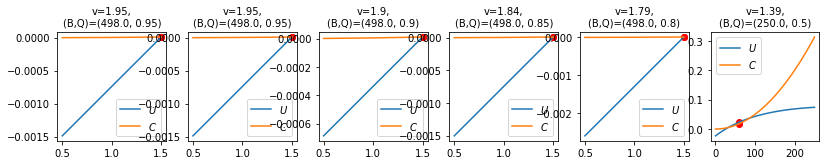

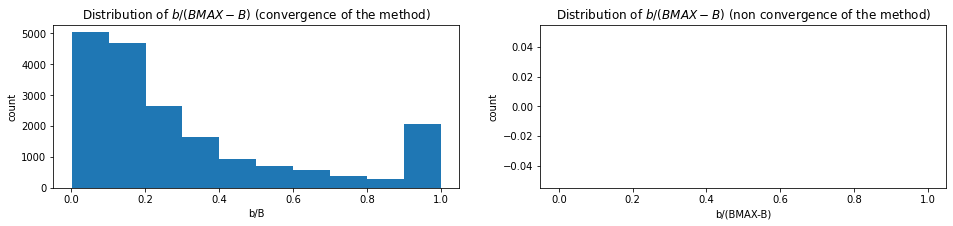

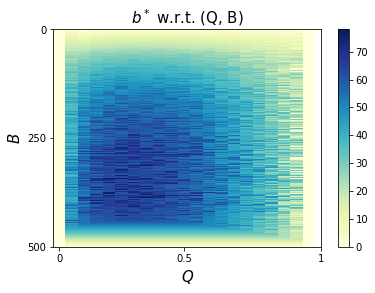

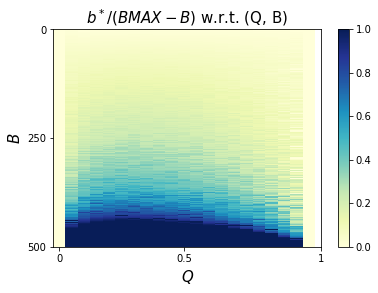

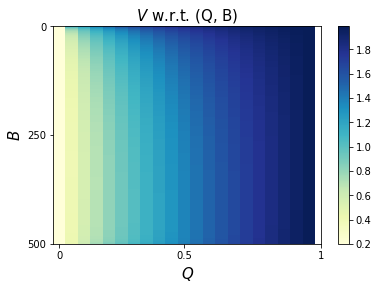

In [26]:
# OLD
# MAIN FUNCTIONS
BETAC = 5*10**(-6)
BETAS = 0.6
BETAM = 0.7
P = 0.5

def U(Q, p=P):
    return (Q**p)/p

def sigma(B, b, betas = BETAS):
    return betas*(1.1-b/(B+b))*(B+b > 0)

def mu(B, b, betam = BETAM):
    return betam*(b/(B+b))*(B+b > 0)

def cost(b, betac=BETAC, d=2):
    return betac*b**d

#viz_main_functions(BMAX, NQ)

b_optimal, b_optimal_over_B, V, keep_i, keep_j = optimal_batch(dQ_step,
                                               0.5, #dB_step,
                                               BMAX,
                                               print_res = False,
                                               print_steps = True,
                                               plot_distrib = True,
                                               eps = 0.0001,
                                               n_iterations = 10,
                                               n_explosions = 0,
                                               n_print_coeffs = 4,#100,
                                               betac = BETAC,
                                               betam = BETAM,
                                               betas = BETAS,
                                               p = P) #0.9
viz_heatmap(b_optimal, title="$b^*$")
viz_heatmap(b_optimal_over_B, title="$b^*/(BMAX-B)$");
viz_heatmap(V, title="$V$");

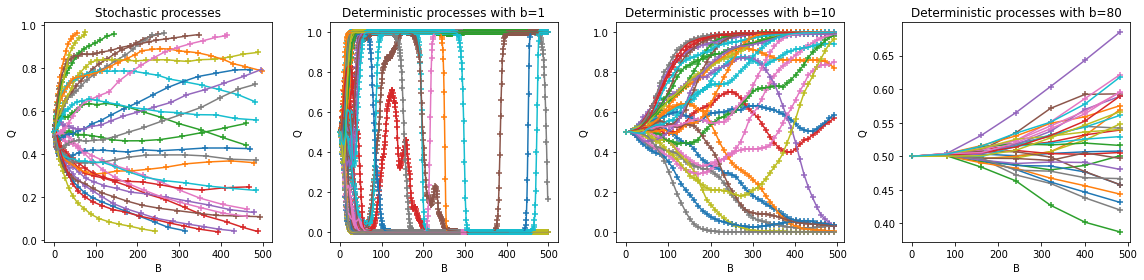

In [27]:
plt.figure(figsize=(16, 4))
n_simu = 30
B0 = 1

Q0 = 0.5
bopts_list=[]
B_list=[]
Q_list=[]

plt.subplot(1, 4, 1)
for _ in range(n_simu):
    B, Q, bopts, boptstr_i, boptstr_j = stochastic_simulation(b_optimal, B0 = B0, n=1000, T=10) # dt = T/n
    bopts_list.append(bopts)
    B_list.append(B)
    Q_list.append(Q)
    plt.plot(B, Q, linestyle="-")
    plt.scatter(B, Q, marker="+")
plt.xlabel("B")
plt.ylabel("Q")
plt.title("Stochastic processes")

for i, b0 in enumerate([1, 10, 80], start=2):
    #print(i, b0)
    plt.subplot(1, 4, i)
    for _ in range(n_simu):
        b_const = b0*np.ones(b_optimal.shape)
        B, Q, b, btr_i, btr_j = stochastic_simulation(b_const, B0=B0, Q0=Q0, n=1000, T=10)
        plt.plot(B, Q, linestyle="-")
        plt.scatter(B, Q, marker="+")
    plt.xlabel("B")
    plt.ylabel("Q")
    plt.title(f"Deterministic processes with b={b0}")

plt.tight_layout();

In [28]:
#viz_heatmap(b_optimal_over_B, title="$b^*/(BMAX-B)$", btr_i = boptstr_i, btr_j = boptstr_j);
#viz_heatmap(V, title="$V$", btr_i = boptstr_i, btr_j = boptstr_j);

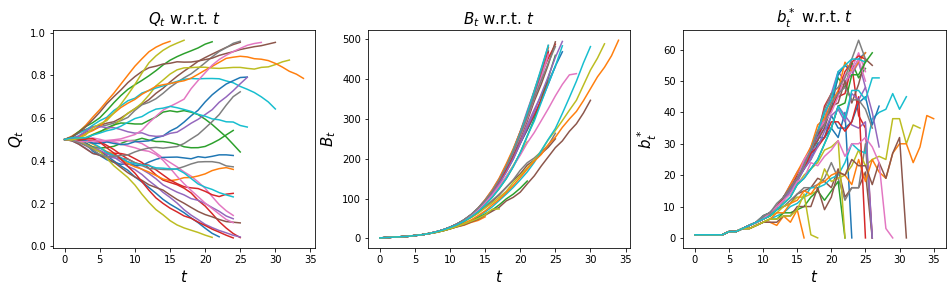

In [29]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
for Q in Q_list:
    plt.plot(np.arange(len(Q)), Q)
    plt.xlabel("$t$", fontsize=15)
    plt.ylabel("$Q_t$", fontsize=15)
    plt.title("$Q_t$ w.r.t. $t$", fontsize=15)
    
plt.subplot(1, 3, 2)
for B in B_list:
    plt.plot(np.arange(len(B)), B)
    plt.xlabel("$t$", fontsize=15)
    plt.ylabel("$B_t$", fontsize=15)
    plt.title("$B_t$ w.r.t. $t$", fontsize=15)

plt.subplot(1, 3, 3)
for bopts in bopts_list:
    plt.plot(np.arange(len(bopts)), bopts)
    plt.xlabel("$t$", fontsize=15)
    plt.ylabel("$b^*_t$", fontsize=15)
    plt.title("$b^*_t$ w.r.t. $t$", fontsize=15);

In [30]:
print(V[-5:, :])
list(zip(V[:, 0], V[:, 1], V[:, -2], V[:, -1]))[-10:]

[[0.2        0.4360703  0.60782179 0.74682499 0.86623157 0.9725328
  1.06939435 1.15902321 1.24289322 1.32200845 1.39708731 1.46866229
  1.53713844 1.60282978 1.66598281 1.72679231 1.78540018 1.8418902
  1.89618834 1.94755858 1.98997487]
 [0.2        0.43800886 0.61154073 0.75128933 0.87088015 0.97711934
  1.07373728 1.16306166 1.24658044 1.32531188 1.39998685 1.47114877
  1.53921263 1.60450179 1.66727192 1.72772719 1.78603145 1.84228394
  1.89645203 1.94783118 1.98997487]
 [0.2        0.4403671  0.61625588 0.75689    0.87669808 0.98275066
  1.07907772 1.16802735 1.25111012 1.32936385 1.403536   1.47418445
  1.54173714 1.60652946 1.6688288  1.72885111 1.78677257 1.84273792
  1.89675217 1.94817837 1.98997487]
 [0.2        0.44333588 0.62260207 0.76437158 0.88415007 0.98998996
  1.08594734 1.17440966 1.25692143 1.33454847 1.40806173 1.47803929
  1.5449271  1.60907711 1.67077243 1.73024441 1.78768466 1.8432537
  1.89708738 1.94864836 1.98997487]
 [0.2        0.4472136  0.63245553 0.774596

[(0.2, 0.42974414890297935, 1.9467209215428987, 1.98997487421324),
 (0.2, 0.43071451560790075, 1.9468460557558236, 1.98997487421324),
 (0.2, 0.4318007511051166, 1.9469870809336278, 1.98997487421324),
 (0.2, 0.4330290715969722, 1.9471482790817296, 1.98997487421324),
 (0.2, 0.43443533684382984, 1.9473357472490773, 1.98997487421324),
 (0.2, 0.4360702997842971, 1.9475585787009129, 1.98997487421324),
 (0.2, 0.4380088575586082, 1.9478311803527244, 1.98997487421324),
 (0.2, 0.44036710182201555, 1.9481783692737062, 1.98997487421324),
 (0.2, 0.44333588433731885, 1.9486483639251382, 1.98997487421324),
 (0.2, 0.4472135954999579, 1.949358868961793, 1.98997487421324)]

In [31]:
list(zip(V[:, 0], V[:, 1], V[:, -2], V[:, -1]))[:10]

[(0.2, 1.4180583133626519, 1.986467362043074, 1.98997487421324),
 (0.2, 1.270064690955299, 1.9852410971089005, 1.98997487421324),
 (0.2, 1.1753795978397599, 1.9842114485931102, 1.98997487421324),
 (0.2, 1.1082902787820577, 1.98332634635312, 1.98997487421324),
 (0.2, 1.0574758431278724, 1.9825513947030968, 1.98997487421324),
 (0.2, 1.0164411479201885, 1.9818403343603201, 1.98997487421324),
 (0.2, 0.9825418605259986, 1.9811757607881675, 1.98997487421324),
 (0.2, 0.9537732952478649, 1.98055050975466, 1.98997487421324),
 (0.2, 0.9288665101270108, 1.9799587699459722, 1.98997487421324),
 (0.2, 0.9070397867570064, 1.9794080511083934, 1.98997487421324)]

## Questions, remarks and TODO

- In the experimentation <font color="red">$dB = 1$</font>


- Vectorize the terms in order to speed up the experimentation

## TO KEEP

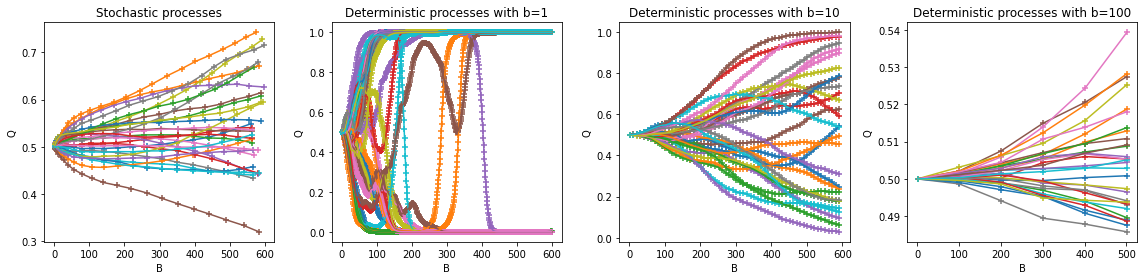